In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.DataFrame({'x': np.arange(-6, 6.01, 0.01)})
df

,x
0,-6.00
1,-5.99
2,-5.98
3,-5.97
4,-5.96
...,...
1196,5.96
1197,5.97
1198,5.98
1199,5.99


In [3]:
def linear(x):
    return x

<Axes: xlabel='x'>

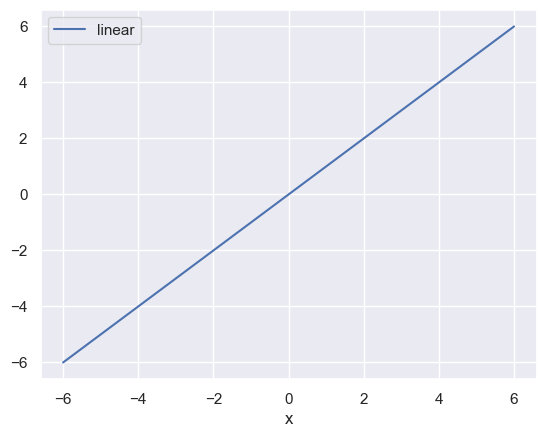

In [45]:
df['linear'] = linear(df['x'])
df.plot(x='x', y='linear')

In [5]:
def binary(x):
    if x < 0:
        return 0
    else:
        return 1

<Axes: xlabel='x'>

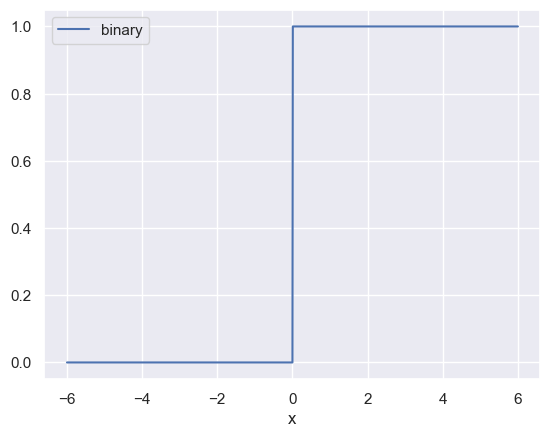

In [6]:
df['binary'] = df['x'].apply(binary)
df.plot(x='x', y='binary')

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<Axes: xlabel='x'>

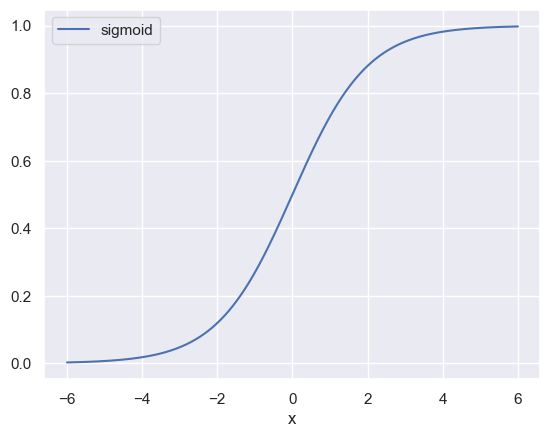

In [8]:
df['sigmoid'] = df['x'].apply(sigmoid)
df.plot(x='x', y='sigmoid')

<Axes: xlabel='x'>

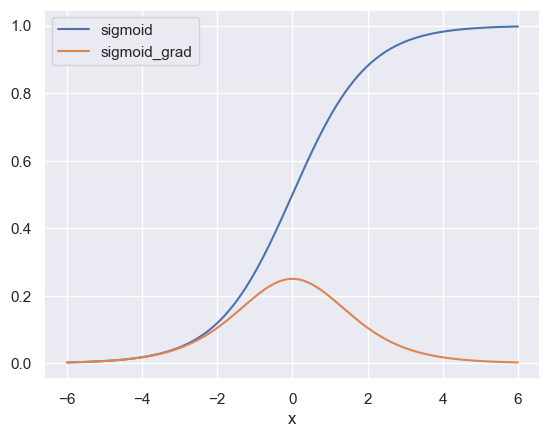

In [9]:
df['sigmoid_grad'] = df['sigmoid'] * (1 - df['sigmoid'])
df.plot(x='x', y=['sigmoid', 'sigmoid_grad'])

In [15]:
def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

<Axes: xlabel='x', ylabel='sigmoid_grad'>

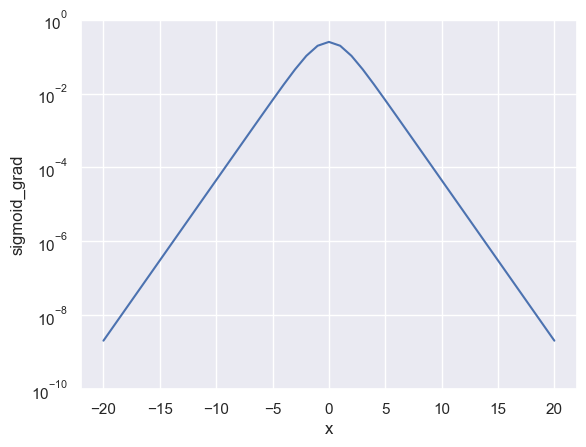

In [28]:
index = np.arange(-20, 21, 1)
pd.Series(data=sigmoid_grad(index), index=index).plot(logy=True, ylim=(1E-10, 1), xlabel='x', ylabel='sigmoid_grad')

In [22]:
sigmoid_grad(index)

array([2.06115361e-09, 5.60279637e-09, 1.52299793e-08, 4.13993738e-08,
       1.12535149e-07, 3.05902133e-07, 8.31527336e-07, 2.26031919e-06,
       6.14413685e-06, 1.67011429e-05, 4.53958077e-05, 1.23379350e-04,
       3.35237671e-04, 9.10221180e-04, 2.46650929e-03, 6.64805667e-03,
       1.76627062e-02, 4.51766597e-02, 1.04993585e-01, 1.96611933e-01,
       2.50000000e-01, 1.96611933e-01, 1.04993585e-01, 4.51766597e-02,
       1.76627062e-02, 6.64805667e-03, 2.46650929e-03, 9.10221180e-04,
       3.35237671e-04, 1.23379350e-04, 4.53958077e-05, 1.67011429e-05,
       6.14413685e-06, 2.26031919e-06, 8.31527336e-07, 3.05902133e-07,
       1.12535149e-07, 4.13993739e-08, 1.52299793e-08, 5.60279642e-09,
       2.06115369e-09])

In [29]:
import tensorflow as tf

2023-07-24 11:07:18.321966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
def my_show(df, tf_func):
    name = tf_func.__name__.split('.')[-1]
    grad_name = name+'_grad'
    x = tf.constant(df['x'])
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = tf_func(x)
    dy_dx = tape.gradient(y, x)

    df[name] = y.numpy()
    df[grad_name] = dy_dx.numpy()
    df.plot(x='x', y=[name, grad_name]) 

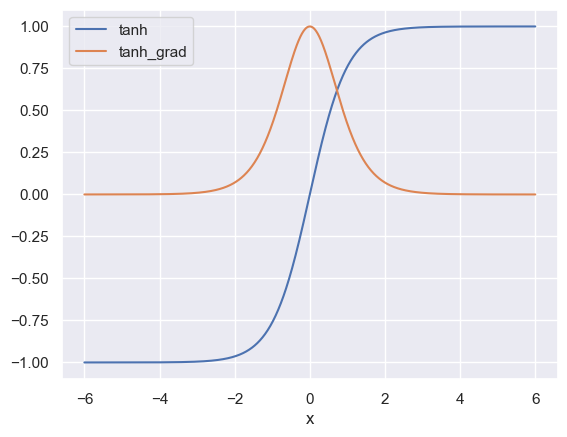

In [40]:
my_show(df, tf.keras.activations.tanh)

<Axes: xlabel='x'>

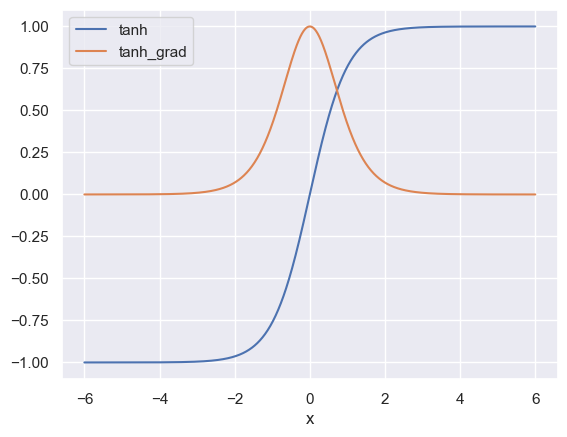

In [36]:
x = tf.constant(df['x'])
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.keras.activations.tanh(x)
dy_dx = tape.gradient(y, x)

df['tanh'] = y.numpy()
df['tanh_grad'] = dy_dx.numpy()
df.plot(x='x', y=['tanh', 'tanh_grad'])

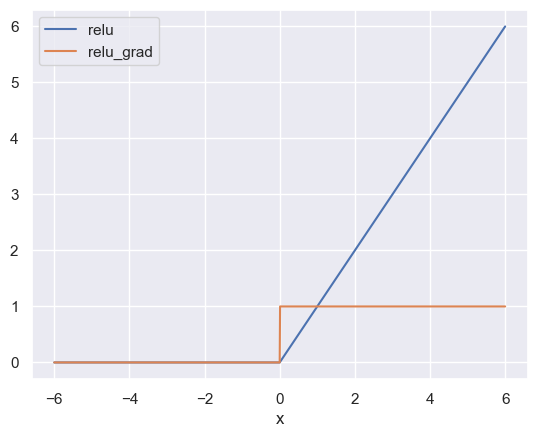

In [43]:
my_show(df, tf.keras.activations.relu)

In [52]:
x = tf.constant([0.0])
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.keras.activations.relu(x)
dy_dx = tape.gradient(y, x)
print(y.numpy(), dy_dx.numpy())

[0.] [0.]


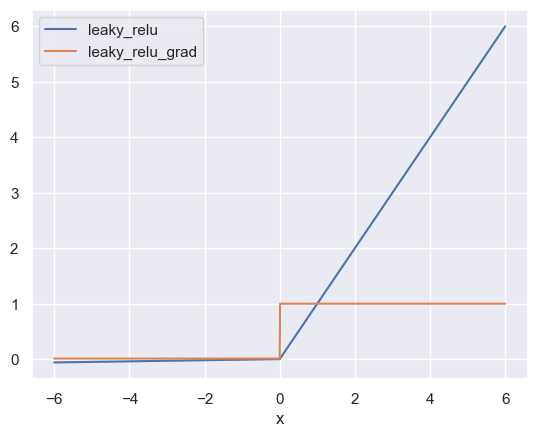

In [54]:
def leaky_relu(x):
    return tf.keras.activations.relu(x, alpha=0.01)
my_show(df, leaky_relu)

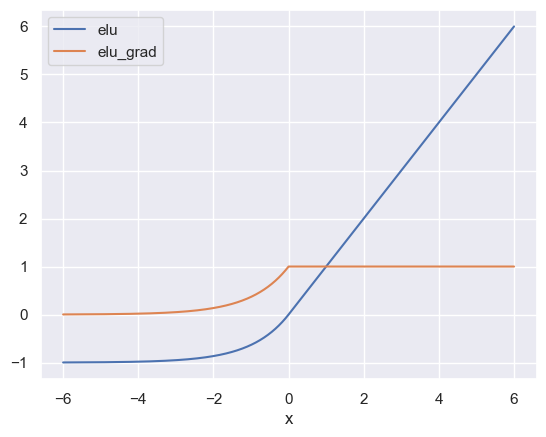

In [55]:
my_show(df, tf.keras.activations.elu)

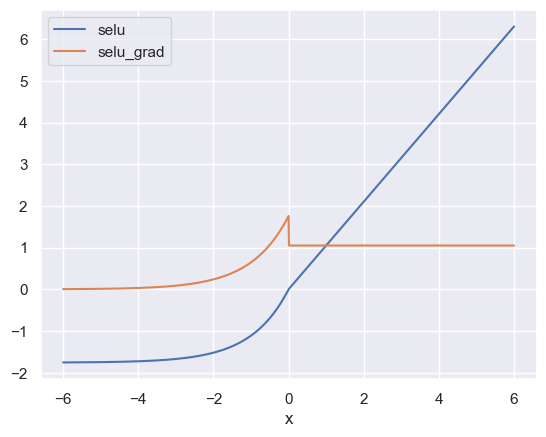

In [56]:
my_show(df, tf.keras.activations.selu)

In [61]:
from scipy.stats import norm

In [62]:
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

<Axes: xlabel='X'>

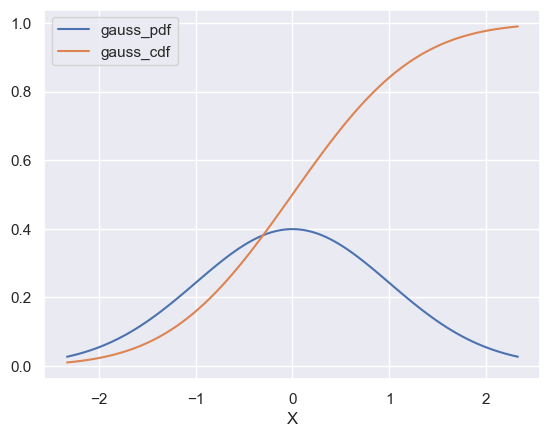

In [69]:
pd.DataFrame({'X': x, 'gauss_pdf': norm.pdf(x), 'gauss_cdf': norm.cdf(x)}).plot(x='X')

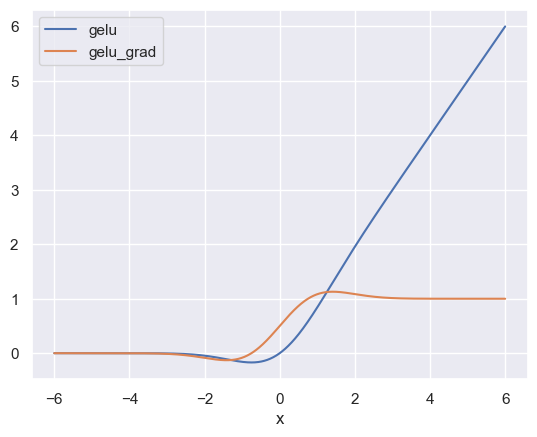

In [67]:
my_show(df, tf.keras.activations.gelu)

In [70]:
from scipy.stats import logistic

In [71]:
x = np.linspace(logistic.ppf(0.01),
                logistic.ppf(0.99), 100)

<Axes: xlabel='X'>

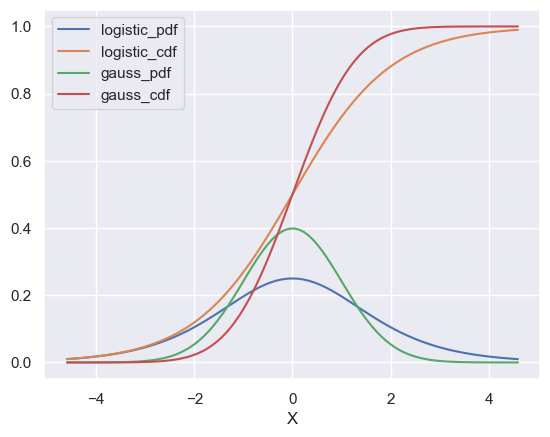

In [75]:
pd.DataFrame({'X': x, 'logistic_pdf': logistic.pdf(x), 'logistic_cdf': logistic.cdf(x), 'gauss_pdf': norm.pdf(x), 'gauss_cdf': norm.cdf(x)}).plot(x='X')

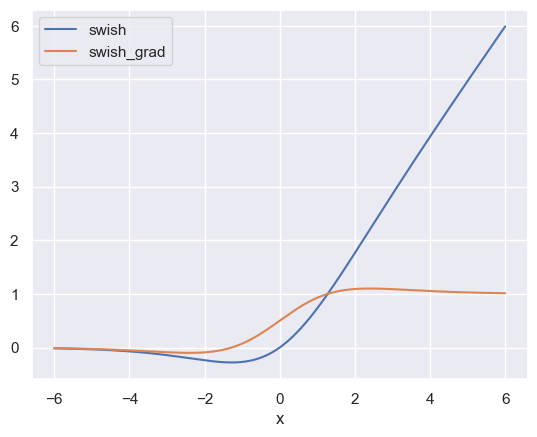

In [76]:
my_show(df, tf.keras.activations.swish)

<Axes: xlabel='x'>

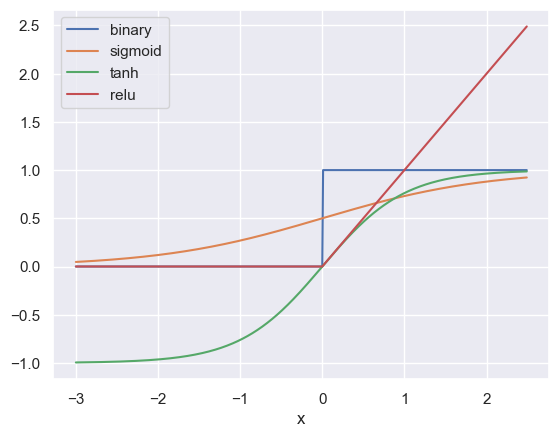

In [89]:
df[300:850].plot(x='x', y=['binary', 'sigmoid', 'tanh', 'relu'])

<Axes: xlabel='x'>

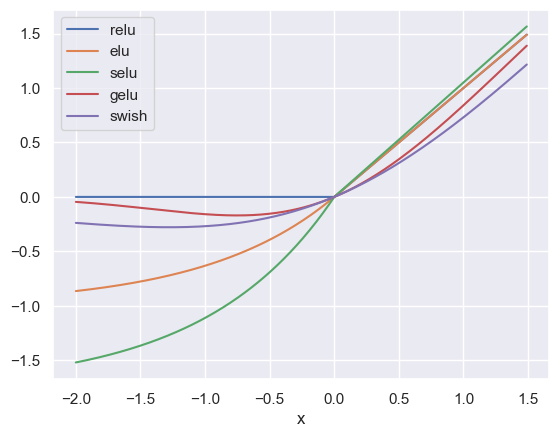

In [87]:
df[400:750].plot(x='x', y=['relu', 'elu', 'selu', 'gelu', 'swish'])